In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import difflib

%matplotlib inline

In [2]:
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")

C:\Users\Draculabites\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: DtypeWarning: Columns (3,21,22,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(-10)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217.0,40.683580,-73.976170,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.000000,0.000000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835044,07/03/2012,15:22,BROOKLYN,11212.0,40.661997,-73.919593,"(40.661997, -73.9195931)",EAST 98 STREET,KINGS HIGHWAY,NaN,...,NaN,NaN,NaN,NaN,135064,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
1835045,07/08/2012,15:00,QUEENS,11102.0,40.767228,-73.918907,"(40.767228, -73.9189065)",33 STREET,28 ROAD,NaN,...,NaN,NaN,NaN,NaN,272639,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1835046,07/02/2012,9:45,BRONX,10470.0,40.896082,-73.866916,"(40.8960825, -73.8669163)",EAST 233 STREET,KATONAH AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,94882,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
1835047,07/06/2012,23:05,MANHATTAN,10019.0,40.762342,-73.982352,"(40.7623421, -73.9823516)",WEST 52 STREET,7 AVENUE,NaN,...,Lost Consciousness,NaN,NaN,NaN,37696,PICK-UP TRUCK,VAN,NaN,NaN,NaN


#### Exploratory

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835059 entries, 0 to 1835058
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [5]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [6]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           566678
ZIP CODE                          566899
LATITUDE                          217947
LONGITUDE                         217947
LOCATION                          217947
ON STREET NAME                    374819
CROSS STREET NAME                 658906
OFF STREET NAME                  1552609
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5278
CONTRIBUTING FACTOR VEHICLE 2     265351
CONTRIBUTING FACTOR VEHICLE 3    1709535
CONTRIBUTING FACTOR VEHICLE 4    1807636
CONTRIBUTING FACTOR VEHICLE 5    1827793
COLLISION_ID                           0
VEHICLE TYPE COD

In [7]:
df.groupby("BOROUGH").count()

,CRASH DATE,CRASH TIME,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
BOROUGH,,,,,,,,,,,,,,,,,,,,,
BRONX,183993,183993,183989,177577,177577,177577,140696,140628,42907,183992,...,150273,11141,2732,772,183993,182566,143660,10831,2652,744
BROOKLYN,399241,399241,399236,389468,389468,389468,314322,314241,84902,399237,...,336939,27015,6714,1977,399241,396830,324229,26317,6552,1939
MANHATTAN,291977,291977,291959,282469,282469,282469,242871,242804,49091,291974,...,250763,9637,1690,458,291977,290296,249710,9481,1650,450
QUEENS,339724,339724,339532,331487,331487,331487,275392,275093,64199,339721,...,291175,23330,5206,1420,339724,338027,280151,22584,5084,1389
STATEN ISLAND,53446,53446,53444,51936,51936,51936,44795,44793,8646,53446,...,45304,3770,682,134,53446,53172,42969,3663,665,131


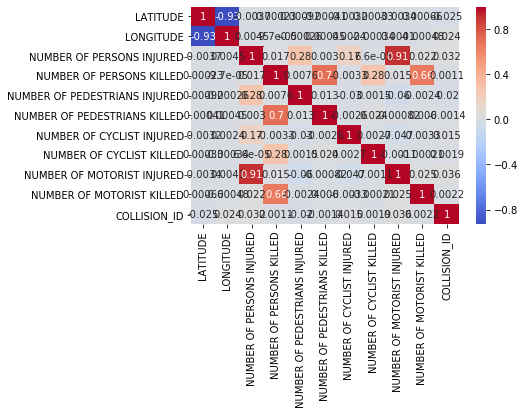

In [8]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

#### Lower strings

In [47]:
# df = df.apply(lambda x: x.astype(str).str.lower())
# df.head()

#### Realise got same vehicles but differently written -> Find similar strings

In [15]:
vehicles = df.loc[:, "VEHICLE TYPE CODE 1":"VEHICLE TYPE CODE 5"]
vehicles

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,Sedan,Sedan,NaN,NaN,NaN
1,Sedan,NaN,NaN,NaN,NaN
2,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,Sedan,NaN,NaN,NaN,NaN
4,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
...,...,...,...,...,...
1835054,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1835055,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1835056,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,NaN,NaN,NaN
1835057,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [37]:
vList = list(set(vehicles.stack().tolist()))
vList

['Unkow',
 'DOLLAR VAN',
 'FOOD CART',
 'del',
 'SW/VAN',
 'TOWMA',
 'st',
 'NYC FD',
 'C 1',
 'TLR',
 'Shove',
 "12' o",
 'GLP050VXEV',
 'Movin',
 'OFFIC',
 '8X20',
 'T650',
 'Dent and S',
 'SEN',
 'uni',
 'Mercedes',
 'PICK UP TR',
 'forklift',
 'nyfd',
 'OMC',
 'Lunch Wagon',
 'MAN B',
 'HDC',
 'DOT EQUIPM',
 'pas',
 'UPS t',
 'psd',
 'truck',
 'U HAU',
 'CT',
 'lift',
 'Firet',
 'Electronic',
 'VAN TRUCK',
 'motor',
 'nycta',
 'US Mail Tr',
 'TRANSIT VA',
 '2 DR',
 'Delivery',
 'BOX',
 'wg',
 'TOWIN',
 'MOPET',
 'Pick up Tr',
 'E Bik',
 'commerical',
 'ESCOOTER',
 'PERM',
 'Cmix',
 'WINNE',
 'Dodge',
 'EMS B',
 'TKP',
 'PRIVATE',
 'Garba',
 'CITY',
 'CITY VEHIC',
 'FEIG',
 'PCH',
 'REVEL SCOO',
 'COUPE',
 'seagr',
 'COLLECTION',
 'Motorscooter',
 'SMALL COM VEH(4 TIRES) ',
 'NYC TRANSI',
 'gover',
 '430',
 'ulili',
 'G1',
 'BUs',
 'OLC',
 'SANAT',
 'VAN/TRANSI',
 'Suburban',
 'Excavator',
 '2TON',
 'SANMEN COU',
 'FDNY LADDE',
 'Power shov',
 'Golf Cart',
 '12 fe',
 'Yamaha',
 'NYS

In [39]:
d = {}

for v in vList:
    matched = difflib.get_close_matches(v, vList, cutoff = 0.85)
    if len(matched) > 1:
        d[v] = difflib.get_close_matches(v, vList, cutoff = 0.85)[1:]
d

{'del': ['delv'],
 'NYC FD': ['NYC F', 'NYC D'],
 'TLR': ['TRLR'],
 'PICK UP TR': ['PICKUP TRU', 'PICK-UP TR'],
 'forklift': ['fork lift', 'forlift'],
 'Firet': ['Fire'],
 'VAN TRUCK': ['VAN/TRUCK'],
 'Delivery': ['Delivery t', 'Delivery T'],
 'Pick up Tr': ['Pickup Tru', 'Pick up tr'],
 'commerical': ['commercial'],
 'ESCOOTER': ['E-SCOOTER', 'E SCOOTER'],
 'Cmix': ['Comix'],
 'FEIG': ['FREIG'],
 'Motorscooter': ['Motorscoot'],
 'Suburban': ['suburban'],
 'Excavator': ['excavator', 'Escavator'],
 '2TON': ['2 TON'],
 'Power shov': ['power shov', 'Power Shov'],
 'Golf Cart': ['Golf cart'],
 'Yamaha': ['Yamah'],
 'MINI VAN': ['MINIVAN'],
 'MOPD': ['MOPED', 'MOPAD'],
 'Ebike': ['E-bike', 'E bike'],
 'USPS2': ['USPS'],
 'AMBUL': ['AMBU'],
 'tractor tr': ['Tractor tr'],
 'ELEC': ['ELECT', 'ELECR'],
 'FDNY AMBU': ['FDNY AMBUL'],
 'Subur': ['Subr'],
 'PISH': ['PSH'],
 'Unk': ['Unkn', 'Unk,'],
 'DLVR': ['DELVR', 'DLR'],
 'PICK UP': ['PICKUP'],
 'TRAILOR': ['TRAILER'],
 'Enclosed Body - Removab

In [55]:
difflib.get_close_matches('Station Wagon/Sport Utility Vehicle', vList)

['Station Wagon/Sport Utility Vehicle']

In [46]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [54]:
x = 'Station Wagon/Sport Utility Vehicle'.lower()
y = 'SPORT UTILITY / STATION WAGON'.lower()

fuzz.partial_ratio(x, y)

47